<h1> Hotel Booking Exploratory Data Analysis <\h1>
   

<b> Summary

The major questions answered in this EDA are as follows: 
<ul>
  <li>Distribution of guests in relation to both Hotels</li>
  <li>What factors influence the Average Daily Rate (ADR)</li>
  <li>Length of stay for guests</li>
</ul>
    This dataset examines the differences between two Resort and City hotels based in Portugal over a period of time from July 15 2015 to August 31st 2017
  
    

In [33]:
#setup imports 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
%matplotlib inline 
import os

import warnings
warnings.filterwarnings('ignore')

In [34]:
#there are two different hotels being Resort and City hotel 

load CSV file  and check to ensure that data has loaded correctly 

In [35]:
#read CSV
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


<B> Preprocessing Data </B>

In [36]:
#search for null values in the dataframe 
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<br>

<br>

The there are several columns where values are not in a format that is appropriate for exploritory anaylsis. To correct this we will have to replace the NaN values or drop unneeded columns (setting the children NaN to 0, setting the agent NaN to 0 indicating no agent, and setting country to unknown because that information is not avaiable). The meal column has a description from the input csv that indicates the mealtype "undefined" is interchangable with "SC"(which both signify no meal), consindering the other meal types in the dataset are BB and HB we will convert the undefined into SC for clarity sake.

NOTE: there are some variables that have been anonmyized for privacy sake.

In [37]:
#this opens up the notebook so that you can view all the columns with no limits. 
pd.set_option('display.max_columns', None)

#replace missing values and dropping columns.  
Nan = {'country': 'Unknown', 'children': 0, 'agent': 0}
hotel = hotel.fillna(Nan)

#changing values from unknown to SC in meal column
hotel['meal'].replace('Undefined', 'SC', inplace=True)

In [38]:
#dropping columns that have too many null values: Company column has 94% null values so it is dropped for analysis) 
hotel = hotel.drop(['company'], 1)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [39]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [40]:
#describing categorical data 
hotel.describe(include=["O"])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,4,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [41]:
#viewing the measures of tendency 
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


wiewing the data we can see that there are some particular outliers in the data that we can presume are entry errors and are nonsensical. these few outliers will be removed from the dataset 

In [42]:
#finding the anomly 
hotel[hotel['adr'] == (-6.38)] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [43]:
#find the anomly's and replace 
hotel = hotel.drop([48515])

hotel = hotel.drop([14969])

In [44]:
#there are some a few records that have zero average daily rate(ADR) and are a no-show
#These type of records will be excluded from the dataset since they dont provide any insight. 
hotel.loc[(hotel["adr"]==0) & (hotel["reservation_status"]=="No-Show")]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
6017,Resort Hotel,1,126,2016,May,21,21,0,1,2,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,C,2,No Deposit,0.0,0,Transient,0.0,0,0,No-Show,2016-05-21
6019,Resort Hotel,1,126,2016,May,21,21,0,1,2,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,C,2,No Deposit,0.0,0,Transient,0.0,0,0,No-Show,2016-05-21
9140,Resort Hotel,1,18,2016,October,44,29,0,1,2,0.0,0,BB,PRT,Groups,Direct,0,0,0,A,A,0,No Deposit,0.0,0,Transient,0.0,0,0,No-Show,2016-10-29
10018,Resort Hotel,1,0,2017,February,6,6,1,0,1,0.0,0,HB,PRT,Complementary,Direct,0,0,0,D,E,0,No Deposit,0.0,0,Transient,0.0,0,0,No-Show,2017-02-06
19266,Resort Hotel,1,3,2015,December,50,11,0,2,2,0.0,0,BB,PRT,Complementary,Direct,0,0,0,A,D,0,No Deposit,0.0,0,Transient,0.0,0,0,No-Show,2015-12-11
19503,Resort Hotel,1,11,2015,December,52,23,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,241.0,0,Transient,0.0,0,1,No-Show,2015-12-23
19823,Resort Hotel,1,23,2016,January,2,4,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,314.0,0,Transient,0.0,0,0,No-Show,2016-01-04
23734,Resort Hotel,1,29,2016,April,18,30,0,0,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0,Transient,0.0,0,1,No-Show,2016-04-30
25333,Resort Hotel,1,7,2016,June,26,21,0,0,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,339.0,0,Transient,0.0,0,0,No-Show,2016-06-21
25564,Resort Hotel,1,123,2016,July,27,1,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,0.0,0,1,No-Show,2016-07-01


In [45]:
#checking for data quality 
hotel.is_canceled.value_counts()

0    75165
1    44223
Name: is_canceled, dtype: int64

We see here that just over one third of our entries resulted in cancellations. For the EDA it is important to remove these features when analysing factors with a strong relationship to cancelations as they can heavily skew the  analysis(although for some features in the data it will not have a large impact).

Removing data that has values of 0 for ADR and status of no-show for reseveration status. no revenue was obtained and the persons did not stay so it is a poor data point.

In [46]:
#removing data that has values of 0 for ADR and status of no-show for reseveration status
df = hotel.loc[(hotel["adr"]!=0) & (hotel["reservation_status"]!="No-Show")]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [47]:
#view the data to see what is left after preprocessing
df.shape

(116248, 31)

In [48]:
df.describe(include=["O"])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,116248,116248,116248,116248,116248,116248,116248,116248,116248,116248,116248,116248
unique,2,12,4,178,8,5,9,11,3,4,2,924
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,77220,13621,89855,46295,55529,96039,83718,72511,101535,87230,73419,1452


In [49]:
df = df.reset_index(drop=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116243,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
116244,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
116245,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
116246,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [50]:
#creating Dataframe that excludes the large number of cancelations 
df2 = df[df.is_canceled == 0]
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116243,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
116244,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
116245,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
116246,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


The months August and July show an additional record that can skew analysis. For all analysis invovling this feature we will normalize the data

In [51]:
df.groupby('arrival_date_month')['arrival_date_year'].unique()

arrival_date_month
April              [2016, 2017]
August       [2015, 2016, 2017]
December           [2015, 2016]
February           [2016, 2017]
January            [2016, 2017]
July         [2015, 2016, 2017]
June               [2016, 2017]
March              [2016, 2017]
May                [2016, 2017]
November           [2015, 2016]
October            [2015, 2016]
September          [2015, 2016]
Name: arrival_date_year, dtype: object

<h1> Exploratory Data Analysis </h1>

<b>What does the distribution of guests look like month to month <b/>

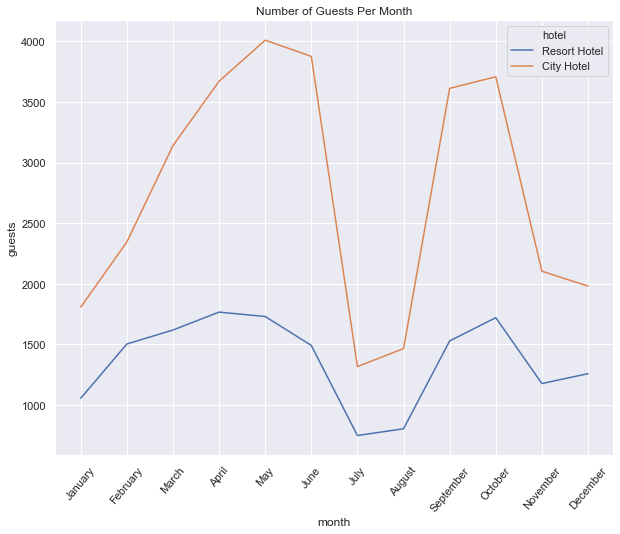

In [52]:
#getting the data
#create split DF for city and resort hotel 
resortdf = df[df['hotel'] == 'Resort Hotel']
resortdf

citydf = df[df['hotel'] == 'City Hotel']
citydf

#get total counts for each month for each city 
mresortdata = resortdf.groupby('arrival_date_month')['hotel'].count()
mcitydata =  citydf.groupby('arrival_date_month')['hotel'].count()

mresortdf = pd.DataFrame({'hotel': 'Resort Hotel','month': list(mresortdata.index),
                          'guests':list(mresortdata.values)})
mcitydf = pd.DataFrame({'hotel': 'City Hotel','month': list(mcitydata.index),
                          'guests':list(mcitydata.values)})
#concat to combine the two hotel data for easy viewing 
monthlydf = pd.concat([mresortdf, mcitydf], ignore_index = True)

#order the months for appropriate ordered viewing 
months = ["January", "February", "March", "April", "May", "June", 
"July", "August", "September", "October", "November", "December"]

monthlydf['month'] = pd.Categorical(monthlydf['month'], categories = months, ordered= True)

#normalizing the data 

monthlydf.loc[(monthlydf["month"] == "July") | (monthlydf["month"] == "August"),
                    "guests"] /= 3
monthlydf.loc[(monthlydf["month"] != "July") | (monthlydf["month"] != "August"),
                    "guests"] /= 2
#graphing
plt.figure(figsize=(10, 8))
sns.set(style = 'darkgrid')
sns.lineplot(x='month', y= 'guests', hue = 'hotel' , data = monthlydf, sort = False)
plt.xticks( rotation= 50)
plt.legend(loc='upper right')
plt.title('Number of Guests Per Month')
plt.show()

<b>What does the distribution of Average Daily Rates look like <b/>

Skewness: 1.20
Kurtosis: 2.34


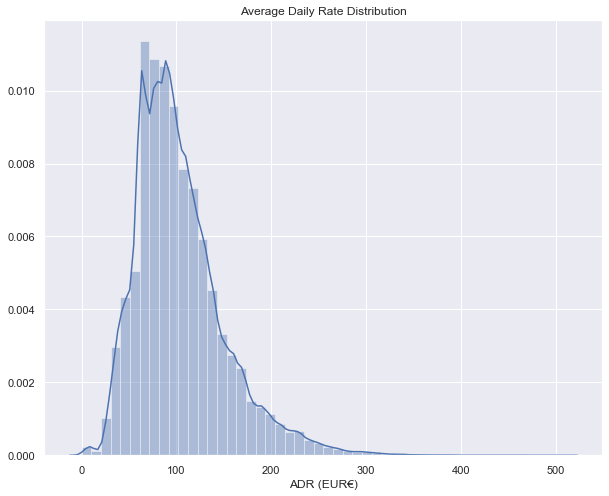

In [53]:
#distribution of average daily rates
print("Skewness: %.2f" % df['adr'].skew())
print("Kurtosis: %.2f" % df['adr'].kurt())
plt.figure(figsize=(10, 8))
sns.distplot(df['adr'])
sns.set(style = 'darkgrid')
plt.title('Average Daily Rate Distribution')
plt.xlabel('ADR (EUR€)')
plt.ion()
plt.show()

<b> How does customer type effect the Average Daily Rate (ADR) across the two hotels. <b/>

<Figure size 720x576 with 0 Axes>

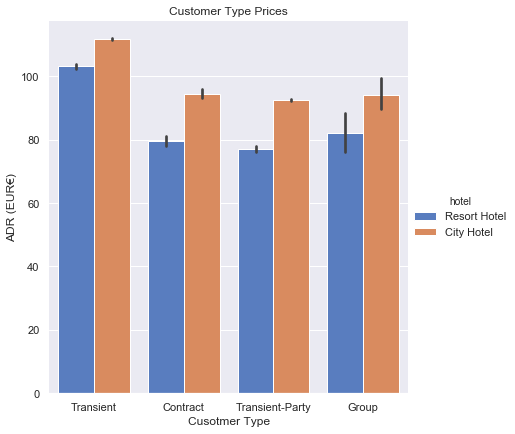

In [54]:
plt.figure(figsize=(10, 8))
sns.set(style="darkgrid")
htc = sns.catplot(x="customer_type", y="adr", hue="hotel", data=df,
height=6, kind="bar", palette="muted")
htc.despine(left=True)
htc.set_ylabels("ADR (EUR€)")
htc.set_xlabels("Cusotmer Type")
plt.title('Customer Type Prices')
plt.ion()
plt.show()

This graph shows that transient type customers generate the highest average daily rate. 

<B> How does lead time influence the ADR <B/>

<Figure size 720x576 with 0 Axes>

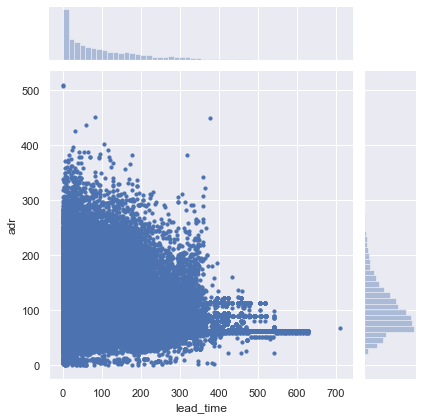

In [55]:
plt.figure(figsize=(10, 8))
sns.jointplot(x="lead_time", y="adr", data=df, s = 10)
plt.show()

The joint plot shows that increased lead time is associated with lower ADR, this would suggest that people who book far in advance enjoy lower costs for Hotels as compared to shorter bookings. 

<b> What is the average daily rate per month </b>

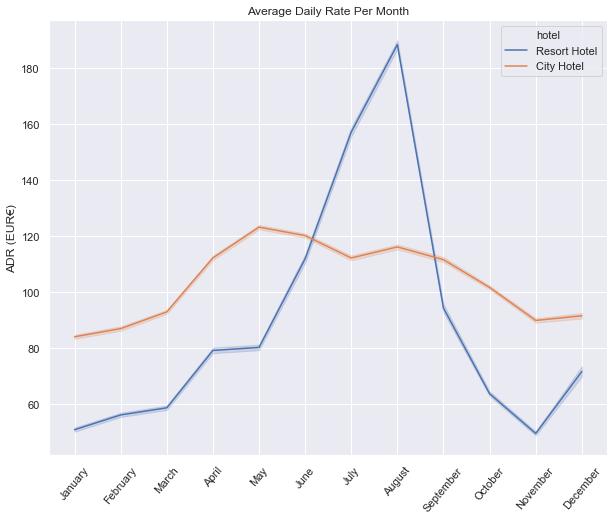

In [56]:
months = ["January", "February", "March", "April", "May", "June", 
"July", "August", "September", "October", "November", "December"]

month_revenue = pd.Categorical(df['arrival_date_month'], categories = months, ordered= True)
plt.figure(figsize=(10, 8))
sns.lineplot(x=month_revenue, y= df.adr, hue = 'hotel' , data = df, sort = False)
plt.xticks( rotation= 50)
plt.ylabel('ADR (EUR€)')
plt.title('Average Daily Rate Per Month')
plt.show()

the graph shows that the summer months generate the most average daily rates for bookings acorss hotels.

what is important to note is that when you compare this graph with the number of guests graph which had larger numbers for fall and spring,  those same dates show this lowest ADR's. This would clearly suggest that prices are better during fall and spring months and the volume of guests are also highest during these months. 

<b>How does number of special requests influence ADR costs?<b/>

<Figure size 720x576 with 0 Axes>

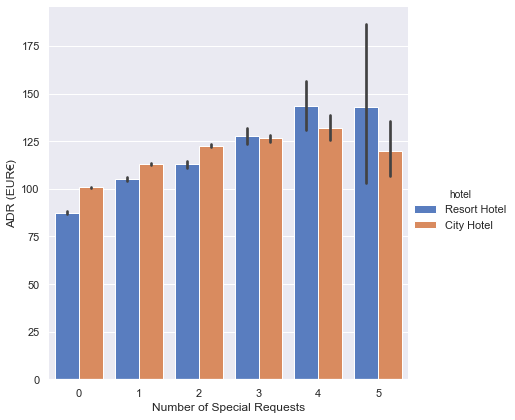

In [57]:
#barplot 
sns.set(style="darkgrid", palette="pastel")
plt.figure(figsize=(10, 8))
htc = sns.catplot(x="total_of_special_requests", y="adr", hue="hotel", data=df,
height=6, kind="bar", palette="muted")
htc.despine(left=True)
htc.set_ylabels("ADR (EUR€)")
htc.set_xlabels("Number of Special Requests")
plt.show()

The graph indicates that as the number of special requests increases so does the cost for daily rate. People who purchase hotel better hotel rooms tend to demand more special requests 

<b>Which room types demands the highest Average Daily Rate?<b/>

<Figure size 720x576 with 0 Axes>

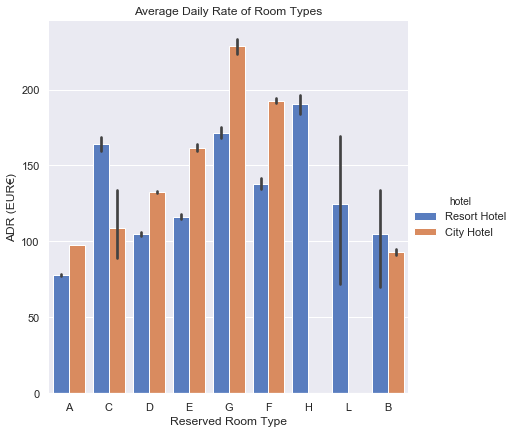

In [58]:
#reserveed room type and average daily rate 
sns.set(style="darkgrid")
plt.figure(figsize=(10, 8))
htc = sns.catplot(x="reserved_room_type", y="adr", hue="hotel", data=df,
                height=6, kind="bar", palette="muted")
htc.despine(left=True)
htc.set_ylabels("ADR (EUR€)")
htc.set_xlabels("Reserved Room Type")
plt.title('Average Daily Rate of Room Types')
plt.show()

Room types G and F demand the highest Average Daily Rate. 

Note: the room types are anonymized for both types of hotels as mentioned before. 

<b>How are the cancelations distributed over a month to month basis ?</b>

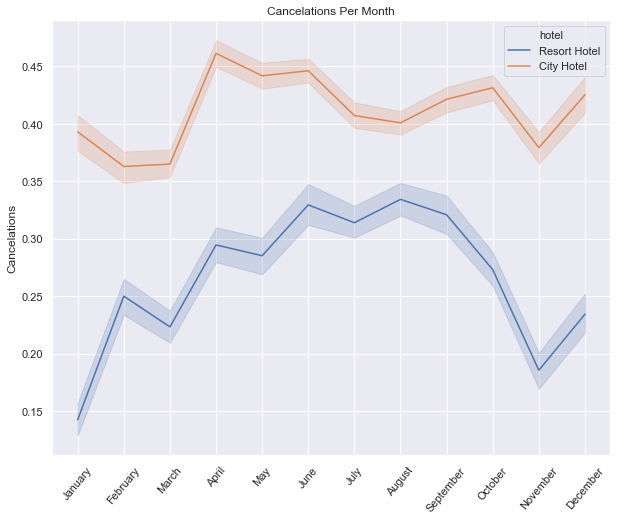

In [59]:
#leadtime cancelations using df
plt.figure(figsize=(10, 8))
sns.lineplot(x=month_revenue, y= 'is_canceled', hue = 'hotel' , data = df, sort = False)
plt.xticks( rotation= 50)
plt.ylabel('Cancelations')
plt.title('Cancelations Per Month')
plt.show()

The cancelations are highest in the summer months for both types of hotels, and these months are also the lowest guest volume for both hotels. In general, City hotel sees more ccancelations than resort hotels do.

In [60]:
#finding values of top visitors for both resorts
topc_resort = df[df['hotel']=="Resort Hotel"]["country"].value_counts().head(10)
topc_city = df[df['hotel']=="City Hotel"]["country"].value_counts().head(10)
topc = pd.concat([topc_city,topc_resort],axis=1)
topc.columns = ["city","resort"]
topc

,city,resort
PRT,29446.0,16849.0
FRA,8733.0,1595.0
DEU,6041.0,1192.0
GBR,5272.0,6743.0
ESP,4562.0,3896.0
ITA,3276.0,456.0
BEL,1883.0,NaN
BRA,1757.0,NaN
NLD,1586.0,509.0
USA,1583.0,474.0


In [61]:
new_topc = topc.rename_axis('country').reset_index()
#create df for resort values 
new_topr = new_topc.drop('city', 1)
new_topr.sort_values(['resort'], ascending=False, inplace= True)
new_topr.reset_index(drop=True)

,country,resort
0,PRT,16849.0
1,GBR,6743.0
2,ESP,3896.0
3,IRL,2160.0
4,FRA,1595.0
5,DEU,1192.0
6,CN,704.0
7,NLD,509.0
8,USA,474.0
9,ITA,456.0


<B> Where are majority of the guests from ? <B/>

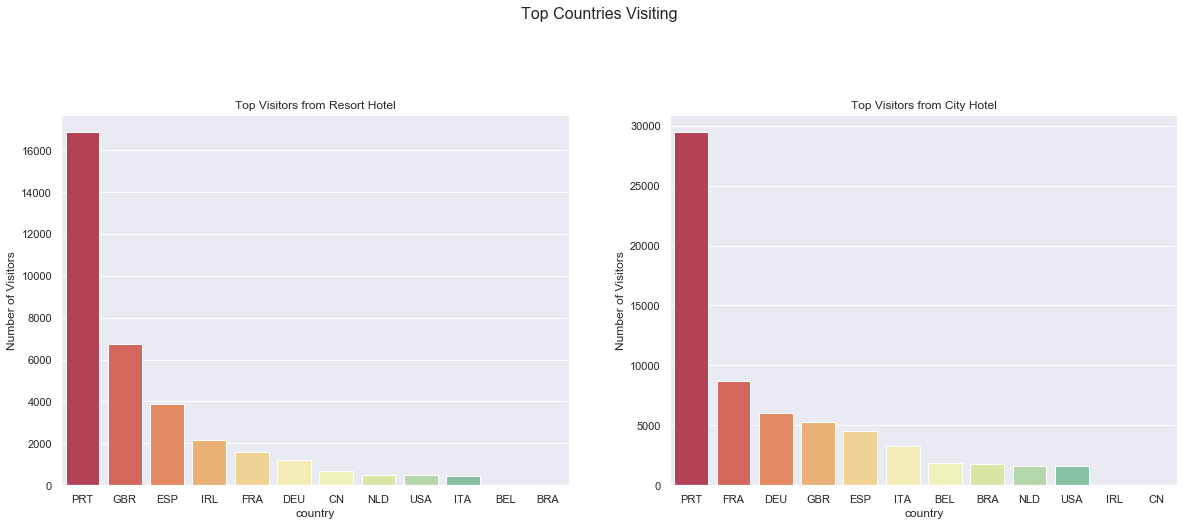

In [62]:
plt.figure(2, figsize=(20,15))
the_grid = gridspec.GridSpec(2, 2)

plt.subplot(the_grid[0, 1],  title='Top Visitors from City Hotel')
sns.barplot(x='country',y='city', data=new_topc, palette='Spectral')
plt.ylabel('Number of Visitors')

plt.subplot(the_grid[0, 0], title='Top Visitors from Resort Hotel',)
sns.barplot(x='country',y='resort', data=new_topr, palette='Spectral')
plt.ylabel('Number of Visitors')

plt.suptitle('Top Countries Visiting ', fontsize=16)
plt.show()

Majority of the guests are from Portugal, Great Britan, and Spain. (Both Hotels are located in Portugal) 

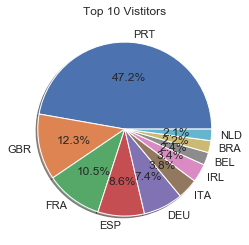

<Figure size 720x576 with 0 Axes>

In [63]:
pie = df['country'].value_counts().head(10)

labels = ['PRT','GBR','FRA','ESP','DEU','ITA','IRL','BEL','BRA','NLD']

fig, ax = plt.subplots()
ax.pie(pie, labels = labels ,autopct='%1.1f%%', shadow=True)
plt.title('Top 10 Vistitors')
plt.figure(figsize=(10, 8))
plt.show()

<b> How long are people staying at the Hotels? </b>

In [64]:
#duration of stay  
df2['totalday'] = df2['stays_in_weekend_nights'] + df2['stays_in_week_nights']
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,totalday
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


Skewness: 3.03
Kurtosis: 27.99


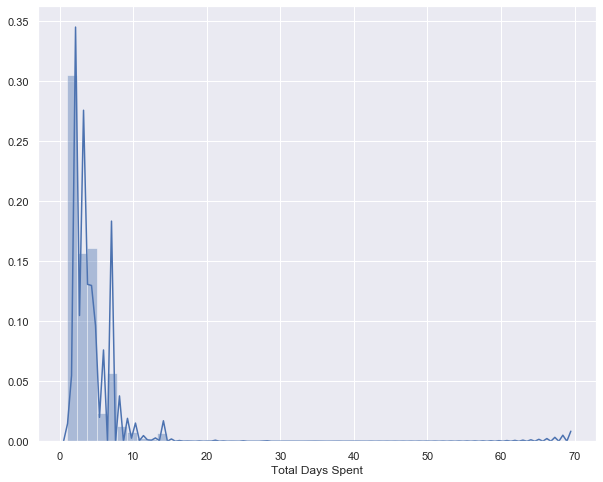

In [65]:
print("Skewness: %.2f" % df2['totalday'].skew())
print("Kurtosis: %.2f" % df2['totalday'].kurt())
plt.figure(figsize=(10, 8))
sns.distplot(df2['totalday'])
plt.xlabel('Total Days Spent')
plt.show()

The vast majority of people stay under 10 days at both types of hotels 

<b> Revenue <b/>

In [66]:
#creating revenue column 
#average daily rate times days spent = room revenue 

df2['Revenue'] = df2.adr * df2.totalday
df2.groupby("hotel")["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,45149.0,318.820133,219.627484,1.0,170.0,270.00,406.08,3910.0
Resort Hotel,28270.0,410.396676,432.877177,4.0,110.0,255.99,560.00,7590.0


<b> How does length of stay influnce ADR <b/>

<Figure size 720x576 with 0 Axes>

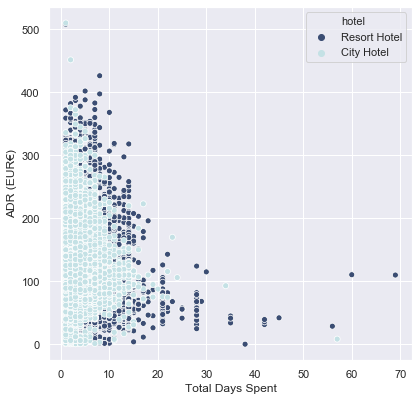

In [67]:
#show figure 
plt.figure(figsize=(10, 8))
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x='totalday', y= 'adr', hue = 'hotel',palette="ch:r=-.2,d=.3_r", 
                data = df2 , ax = ax, sizes=(1,10))
plt.xlabel('Total Days Spent')
plt.ylabel('ADR (EUR€)')
plt.show()

The graph shows that ADR is higher for shorter length of stay. This means that prices are more favourable for people who purchace longer stay packages when compared with shorter stays.

<b> How does assinged room type influence total revenue from a guest over length of stay? <b/>

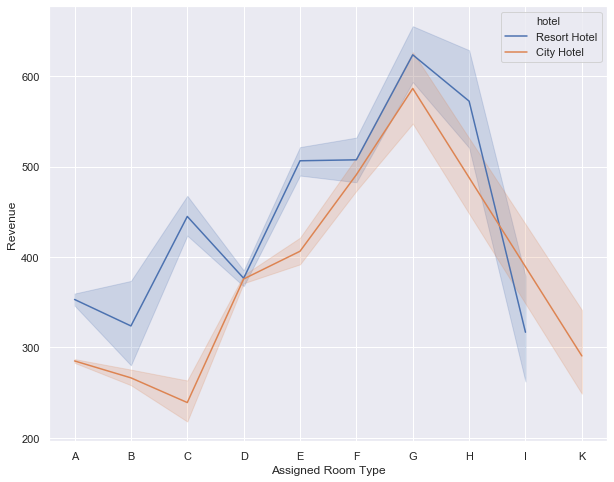

In [69]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=df['assigned_room_type'], y= df2.Revenue, hue = 'hotel' , data = df2)
plt.xlabel('Assigned Room Type')
plt.show()

The highest generating revenue room types are 'G' and 'H' for both resort and city hotel.

---

<h1> Recommendations and Considerations </h1>

Some important considerations in regards to cancelations is to understand that a considerable portion if the data given has these cancelations and the EDA was done removing these variables. These removed data reduce the effectiveness of the EDA.

Some recommendations would be for limiting of the time one can book out for hotels, the data shows that the vast majority of guests who booked far in advance canceled.

<b> If you have any suggestions for what I should take a look at for this dataset please feel free to comment! </b>